# NTE Derivation in 1D for Tensor Trains
$$
\newcommand{\bo}{\boldsymbol{\hat{\Omega}}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\o}{\Omega}
\newcommand{\p}{\partial}
\newcommand{\bm}{\boldsymbol}
\newcommand{\bx}{\boxed}
\newcommand{\f}{\frac}
\def\:#1\:{\begin{align}#1\end{align}}
\def\(#1\){\begin{\pmatrix}#1\end{pmatrix}}
\def\[#1\]{\begin{\bmatrix}#1\end{bmatrix}}
\def\s#1{\Sigma_{#1}}
\def\m#1{\mathcal{#1}}
$$

The 1D discretized NTE using discrete ordinates approximation for the angular dependence is (according to NERS 561 notes):
$$
\:
\f{\mu_n}{\Delta x_i}&[\psi_{i + 1/2, n, g} - \psi_{i - 1/2, n, g}] + \s{t, i, g}\psi_{i, n, g} \\
&= \sum_{g' = 1}^G\sum_{l = 0}^{L}(2l + 1)P_l(\mu_n)\s{sl, g'\rightarrow g}\phi_{l, i, g'} + \f{1}{k}\sum_{g' = 1}^{G}\chi_{g'\rightarrow g}\nu\s{f, i, g'}\phi_{0, i, g'},
\:
$$
where $i\in\{0, 1, ..., I - 1\}$ is the cell index in a cell-centered scheme, $n\in\{0, 1, ..., N - 1\}$ is the ordinate index, $g\in\{1, 2, ..., G\}$ is the group index, and $l\in\{0, 1, ..., L\}$ is the Legendre polynomial order. The $l$th Legendre moment of the angular flux is
$$
\phi_{l, i, g}(x) = \int_{-1}^1P_l(\mu)\psi_{i, g}(\mu)d\mu \approx \sum_{n = 0}^{N - 1}w_nP_l(\mu_n)\psi_{i, g}(\mu_n) = \sum_{n = 0}^{N - 1}w_nP_l(\mu_n)\psi_{i, n, g},
$$
where
$$
\sum_{n = 0}^{N - 1}w_n = 1
$$

Scalar flux is defined as
$$
\phi_{i, g} = \phi_{0, i, g} \approx \sum_{n = 0}^{N - 1}w_n\psi_{i, n, g}.
$$
We approximate the scattering behavior as isotropic such that
$$
\sum_{l = 0}^{L}(2l + 1)P_l(\mu_n)\s{sl, g'\rightarrow g}\phi_{l, i, g'} \rightarrow\s{s0, g'\rightarrow g}\sum_{n = 0}^{N - 1}w_n\psi_{i, n, g'}
$$

The NTE then becomes
$$
\:
\f{\mu_n}{\Delta x_i}&[\psi_{i + 1/2, n, g} - \psi_{i - 1/2, n, g}] + \s{t, i, g}\psi_{i, n, g} \\
&= \sum_{g' = 1}^G\s{s0, g'\rightarrow g}\sum_{n = 0}^{N - 1}w_n\psi_{i, n, g'} + \f{1}{k}\sum_{g' = 1}^{G}\chi_{g'\rightarrow g}\nu\s{f, i, g'}\sum_{n = 0}^{N - 1}w_n\psi_{i, n, g},
\:
$$
We can close the system with diamond difference,
$$
\psi_{i, n, g} = \f{1}{2}(\psi_{i + 1/2, n, g} + \psi_{i - 1/2, n, g}).
$$
Plugging this in we get
$$
\:
\f{\mu_n}{\Delta x_i}&[\psi_{i + 1/2, n, g} - \psi_{i - 1/2, n, g}] + \f{1}{2}\s{t, i, g}(\psi_{i + 1/2, n, g} + \psi_{i - 1/2, n, g}) \\
=&~ \f{1}{2}\sum_{g' = 1}^G\s{s0, g'\rightarrow g}\sum_{n = 0}^{N - 1}w_n(\psi_{i + 1/2, n, g'} + \psi_{i - 1/2, n, g'}) \\
&+ \f{1}{2k}\sum_{g' = 1}^{G}\chi_{g'\rightarrow g}\nu\s{f, i, g'}\sum_{n = 0}^{N - 1}w_n(\psi_{i + 1/2, n, g'} + \psi_{i - 1/2, n, g'}).
\:
$$

^41faa6

## Example: Pu-239 from the [Criticality Verification Benchmark Suite](https://www.sciencedirect.com/science/article/pii/S0149197002000987/pdf?md5=299011580a5d17bc208703ef425a6ba6&pid=1-s2.0-S0149197002000987-main.pdf)

This problem includes a 1D brick of Pu-239 of width $3.707444~cm$ with one group of the following cross section information:

| $\s{t}~[cm^{-1}]$ | $\nu\s{f}~[cm^{-1}]$ | $\s{s}~[{cm^{-1}}]$ | $\chi_{1\rightarrow1}$ |
| :----------------- | :-------------------- | :------------------- | :---------------------- |
| 0.32640           | 0.264384             | 0.225216            | 1.0                    |

Below is the full matrix equation for $N=2$ and $I = 3$ with vacuum boundary conditions. The width of each cell is then $\Delta x = 3.707444~cm / I = 1.235815~cm$. 

The operators based on the NTE provided above are given below.

Streaming operator ($\bm H_x$):

| $\bm{H}_x$        | $\psi_{-1/2, 0}$       | $\psi_{1/2, 0}$        | $\psi_{3/2, 0}$        | $\psi_{5/2, 0}$       | $\psi_{-1/2, 1}$       | $\psi_{1/2, 1}$        | $\psi_{3/2, 1}$        | $\psi_{5/2, 1}$        |
| :----------------- | :---------------------- | :---------------------- | :---------------------- | :--------------------- | :---------------------- | :---------------------- | :---------------------- | :---------------------- |
| $\psi_{-1/2, 0}'$ | $\f{\mu_0}{\Delta x}$  |                        |                        |                       |                        |                        |                        |                        |
| $\psi_{1/2, 0}'$  | $-\f{\mu_0}{\Delta x}$ | $\f{\mu_0}{\Delta x}$  |                        |                       |                        |                        |                        |                        |
| $\psi_{3/2, 0}'$  |                        | $-\f{\mu_0}{\Delta x}$ | $\f{\mu_0}{\Delta x}$  |                       |                        |                        |                        |                        |
| $\psi_{5/2, 0}'$  |                        |                        | $-\f{\mu_0}{\Delta x}$ | $\f{\mu_0}{\Delta x}$ |                        |                        |                        |                        |
| $\psi_{-1/2, 1}'$ |                        |                        |                        |                       | -$\f{\mu_1}{\Delta x}$ | $\f{\mu_1}{\Delta x}$  |                        |                        |
| $\psi_{1/2, 1}'$  |                        |                        |                        |                       |                        | -$\f{\mu_1}{\Delta x}$ | $\f{\mu_1}{\Delta x}$  |                        |
| $\psi_{3/2, 1}'$  |                        |                        |                        |                       |                        |                        | -$\f{\mu_1}{\Delta x}$ | $\f{\mu_1}{\Delta x}$  |
| $\psi_{5/2, 1}'$  |                        |                        |                        |                       |                        |                        |                        | -$\f{\mu_1}{\Delta x}$ |

Total interaction operator ($\bm H_\Sigma$):

| $\bm{H}_\Sigma$   | $\psi_{-1/2, 0}$ | $\psi_{1/2, 0}$ | $\psi_{3/2, 0}$ | $\psi_{5/2, 0}$ | $\psi_{-1/2, 1}$ | $\psi_{1/2, 1}$ | $\psi_{3/2, 1}$ | $\psi_{5/2, 1}$ |
| ----------------- | ---------------- | --------------- | --------------- | --------------- | ---------------- | --------------- | --------------- | --------------- |
| $\psi_{-1/2, 0}'$ | $\s{t}/2$        |                 |                 |                 |                  |                 |                 |                 |
| $\psi_{1/2, 0}'$  | $\s{t}/2$        | $\s{t}/2$       |                 |                 |                  |                 |                 |                 |
| $\psi_{3/2, 0}'$  |                  | $\s{t}/2$       | $\s{t}/2$       |                 |                  |                 |                 |                 |
| $\psi_{5/2, 0}'$  |                  |                 | $\s{t}/2$       | $\s{t}/2$       |                  |                 |                 |                 |
| $\psi_{-1/2, 1}'$ |                  |                 |                 |                 | $\s{t}/2$        | $\s{t}/2$       |                 |                 |
| $\psi_{1/2, 1}'$  |                  |                 |                 |                 |                  | $\s{t}/2$       | $\s{t}/2$       |                 |
| $\psi_{3/2, 1}'$  |                  |                 |                 |                 |                  |                 | $\s{t}/2$       | $\s{t}/2$       |
| $\psi_{5/2, 1}'$  |                  |                 |                 |                 |                  |                 |                 | $\s{t}/2$       |

Scattering operator ($\bm S$):

| $\bm{S}$          | $\psi_{-1/2, 0}$ | $\psi_{1/2, 0}$ | $\psi_{3/2, 0}$ | $\psi_{5/2, 0}$ | $\psi_{-1/2, 1}$ | $\psi_{1/2, 1}$ | $\psi_{3/2, 1}$ | $\psi_{5/2, 1}$ |
| ----------------- | ---------------- | --------------- | --------------- | --------------- | ---------------- | --------------- | --------------- | --------------- |
| $\psi_{-1/2, 0}'$ |                  |                 |                 |                 |                  |                 |                 |                 |
| $\psi_{1/2, 0}'$  | $\s{s}w_0/2$     | $\s{s}w_0/2$    |                 |                 | $\s{s}w_1/2$     | $\s{s}w_1/2$    |                 |                 |
| $\psi_{3/2, 0}'$  |                  | $\s{s}w_0/2$    | $\s{s}w_0/2$    |                 |                  | $\s{s}w_1/2$    | $\s{s}w_1/2$    |                 |
| $\psi_{5/2, 0}'$  |                  |                 | $\s{s}w_0/2$    | $\s{s}w_0/2$    |                  |                 | $\s{s}w_1/2$    | $\s{s}w_1/2$    |
| $\psi_{-1/2, 1}'$ | $\s{s}w_0/2$     | $\s{s}w_0/2$    |                 |                 | $\s{s}w_1/2$     | $\s{s}w_1/2$    |                 |                 |
| $\psi_{1/2, 1}'$  |                  | $\s{s}w_0/2$    | $\s{s}w_0/2$    |                 |                  | $\s{s}w_1/2$    | $\s{s}w_1/2$    |                 |
| $\psi_{3/2, 1}'$  |                  |                 | $\s{s}w_0/2$    | $\s{s}w_0/2$    |                  |                 | $\s{s}w_1/2$    | $\s{s}w_1/2$    |
| $\psi_{5/2, 1}'$  |                  |                 |                 |                 |                  |                 |                 |                 |

Fission operator ($\bm F$):

| $\bm{F}$          | $\psi_{-1/2, 0}$ | $\psi_{1/2, 0}$ | $\psi_{3/2, 0}$ | $\psi_{5/2, 0}$ | $\psi_{-1/2, 1}$ | $\psi_{1/2, 1}$ | $\psi_{3/2, 1}$ | $\psi_{5/2, 1}$ |
| ----------------- | ---------------- | --------------- | --------------- | --------------- | ---------------- | --------------- | --------------- | --------------- |
| $\psi_{-1/2, 0}'$ |                  |                 |                 |                 |                  |                 |                 |                 |
| $\psi_{1/2, 0}'$  | $\nu\s{f}w_0/2$  | $\nu\s{f}w_0/2$ |                 |                 | $\nu\s{f}w_1/2$  | $\nu\s{f}w_1/2$ |                 |                 |
| $\psi_{3/2, 0}'$  |                  | $\nu\s{f}w_0/2$ | $\nu\s{f}w_0/2$ |                 |                  | $\nu\s{f}w_1/2$ | $\nu\s{f}w_1/2$ |                 |
| $\psi_{5/2, 0}'$  |                  |                 | $\nu\s{f}w_0/2$ | $\nu\s{f}w_0/2$ |                  |                 | $\nu\s{f}w_1/2$ | $\nu\s{f}w_1/2$ |
| $\psi_{-1/2, 1}'$ | $\nu\s{f}w_0/2$  | $\nu\s{f}w_0/2$ |                 |                 | $\nu\s{f}w_1/2$  | $\nu\s{f}w_1/2$ |                 |                 |
| $\psi_{1/2, 1}'$  |                  | $\nu\s{f}w_0/2$ | $\nu\s{f}w_0/2$ |                 |                  | $\nu\s{f}w_1/2$ | $\nu\s{f}w_1/2$ |                 |
| $\psi_{3/2, 1}'$  |                  |                 | $\nu\s{f}w_0/2$ | $\nu\s{f}w_0/2$ |                  |                 | $\nu\s{f}w_1/2$ | $\nu\s{f}w_1/2$ |
| $\psi_{5/2, 1}'$  |                  |                 |                 |                 |                  |                 |                 |                 |

These operators are then used to construct the eigenvalue problem
$$
[\bm H_x + \bm H_{\Sigma}]\Psi = \f{1}{k}\bm F \Psi.
$$
For a Gauss-Legendre quadrature set of $N = 2$: $\mu_0 = 0.5774$ and $\mu_1 = -0.5774$. The weights of these ordinates are $w_0 = w_1 = 0.5$. We can verify the $S_N$ solver in `discrete_ordinates.py` is building the tensors/matrices correctly.

### Discrete Ordinates Solver Implementation

The $S_N$ solver in `discrete_ordinates.py` builds the $d$-way operators based on the tensor cores provided in [Truong et al.](https://www.sciencedirect.com/science/article/pii/S002199912400192X#br0520). The tensor trains for $\mu_n > 0$ in 1D are
$$
\:
\bm {\m H}_x^{TT, 1} &= \bm I_G \circ \bm Q_{\mu} \circ \bm{D}_x^+,\\
\bm {\m H}_\Sigma^{TT, 1} &= \text{diag}(\Sigma_t)\circ(\bm{C}_1\otimes\bm{I}_{L/2})\circ \bm {Ip}_x^+,\\
\bm {\m F}^{TT, 1} &= \bm{\Sigma}_f \circ \bm{Intg}^1\circ\bm{Ip}_{x, noBC}^+,\\
\bm{\m S}^{TT, 1} &=  \bm{\Sigma}_s \circ \bm{Intg}^1\circ\bm{Ip}_{x, noBC}^+,
\:
$$
where all definitions are consistent with [Truong et al.](https://www.sciencedirect.com/science/article/pii/S002199912400192X#br0520); however, the definitions related to directions were reduced from 8 octants to 2 halfspaces. Additionally, the definition of the integral operator as defined in [Truong et al.](https://www.sciencedirect.com/science/article/pii/S002199912400192X#br0520) is incorrect. The integral operator is
$$
\bm{Intg}^1 = \bm A_1 \otimes (\bm 1_{L/2}\otimes w),
$$
where $\bm A_1$ is 
$$
\bm A_1 = \begin{pmatrix}
1 & 1\\
0 & 0
\end{pmatrix}.
$$
In general, $(\bm A_i)_{i:} = 1$ and zeros everywhere else for $i \in \{0, ..., 7\}$ in the case of 3D and $i \in \{0,1\}$ for 1D.

The `DiscreteOrdinates.solve_matrix_power()` method computes the tensor dots and Kronecker products to build the full $G\times N\times (I + 1)\times G\times N\times (I + 1)$ tensor operators and flattens it into a $GN(I + 1)\times GN(I + 1)$ matrix. It then converts these from `numpy.ndarray`s to `scipy.sparse.csc_matrix`s since all operators are ~99% sparse. It then computes the inverse of $\bm {H} =\bm {H}_x + \bm {H}_{\Sigma}$, $\bm {H}^{-1}$, and applies that to the right hand side of the matrix form NTE during power iteration.

To verify this solver we can compare the resulting operators to that defined in the prior section.

In [1]:
%load_ext autoreload
%autoreload 2

import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from discrete_ordinates import DiscreteOrdinates
from geometry import Geometry
from material import Material
from nuclide import Nuclide
from xs_server import XSServer

# Nuclides
pu239 = Nuclide(Z=94, A=239)

# Materials
fissile_brick = Material({pu239: 1.0})

# Cross section data
xs = {
    "num_groups": 1,
    "chi": np.array([[1.0]]),
    fissile_brick: {
        "nu_fission": np.array([3.24 * 0.081600]),  # 1/cm
        "scatter_gtg": np.array([[0.225216]]),  # 1/cm
        "total": np.array([0.32640]),  # 1/cm
    },
}
xs_server = XSServer(xs)

# Slab Geometry
thickness = 3.707444  # cm
num_nodes = 3
geometry = Geometry({fissile_brick: {"num_nodes": num_nodes, "thickness": thickness}})

# Initialize SN solver
tol = 1e-6
SN = DiscreteOrdinates(
    xs_server=xs_server, geometry=geometry, num_ordinates=2, tol=tol
)

mat_shape = (
    xs_server.num_groups * SN.num_ordinates * (num_nodes + 1),
    xs_server.num_groups * SN.num_ordinates * (num_nodes + 1),
)

print("\nStreaming + Total Interaction Operator")
pd.DataFrame(SN.H.full().reshape(mat_shape))

Tensor Trains:
Migration operator 
Tensor train with order    = 2, 
                  row_dims = [2, 4], 
                  col_dims = [2, 4], 
                  ranks    = [1, 4, 1]
Fission operator 
Tensor train with order    = 2, 
                  row_dims = [2, 4], 
                  col_dims = [2, 4], 
                  ranks    = [1, 2, 1]
Scatter operator 
Tensor train with order    = 2, 
                  row_dims = [2, 4], 
                  col_dims = [2, 4], 
                  ranks    = [1, 2, 1]

Streaming + Total Interaction Operator


,0,1,2,3,4,5,6,7
0,0.630382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.303982,0.630382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.303982,0.630382,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,-0.303982,0.630382,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.630382,-0.303982,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.630382,-0.303982,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630382,-0.303982
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630382


In [2]:
print("Scattering Operator")
pd.DataFrame(SN.S.full().reshape(mat_shape))

Scattering Operator


,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.056304,0.056304,0.000000,0.000000,0.056304,0.056304,0.000000,0.000000
2,0.000000,0.056304,0.056304,0.000000,0.000000,0.056304,0.056304,0.000000
3,0.000000,0.000000,0.056304,0.056304,0.000000,0.000000,0.056304,0.056304
4,0.056304,0.056304,0.000000,0.000000,0.056304,0.056304,0.000000,0.000000
5,0.000000,0.056304,0.056304,0.000000,0.000000,0.056304,0.056304,0.000000
6,0.000000,0.000000,0.056304,0.056304,0.000000,0.000000,0.056304,0.056304
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
print("Fission Operator")
pd.DataFrame(SN.F.full().reshape(mat_shape))

Fission Operator


,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.066096,0.066096,0.000000,0.000000,0.066096,0.066096,0.000000,0.000000
2,0.000000,0.066096,0.066096,0.000000,0.000000,0.066096,0.066096,0.000000
3,0.000000,0.000000,0.066096,0.066096,0.000000,0.000000,0.066096,0.066096
4,0.066096,0.066096,0.000000,0.000000,0.066096,0.066096,0.000000,0.000000
5,0.000000,0.066096,0.066096,0.000000,0.000000,0.066096,0.066096,0.000000
6,0.000000,0.000000,0.066096,0.066096,0.000000,0.000000,0.066096,0.066096
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


All three operators match the operator matrices derived above.

### TT Paper Reproduction

Below is a reproduction of the ISFM results shown in [Truong et al.](https://www.sciencedirect.com/science/article/pii/S002199912400192X#br0520).

Tensor Trains:
Migration operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
                  ranks    = [1, 4, 1]
Fission operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
                  ranks    = [1, 2, 1]
Scatter operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
                  ranks    = [1, 2, 1]
-- SN with full matrix power iteration
--   (0) Error=16.064405040801848, k=0.816965809727864
--   (1) Error=0.9246475571993451, k=0.8080455404499888
--   (2) Error=0.1386939412894741, k=0.805568013311323
--   (3) Error=0.03051102837666758, k=0.8047199974218383
--   (4) Error=0.01043372043045375, k=0.8043979390853232
--   (5) Error=0.004080886381928204, k=0.8042702717637522
--   (6) Error=0.0016239109967465532, k=0.8042188398467587
--   (7) Error=0.00064832204280

--   (8) Error=0.019829195509891023, k=0.9994703255277789
--   (9) Error=0.009177408330864159, k=0.9995605822508857
--   (10) Error=0.0042486201990885285, k=0.9996027043245859
--   (11) Error=0.0019668884011861164, k=0.9996222882710213
--   (12) Error=0.0009106769537675167, k=0.9996313682808265
--   (13) Error=0.0004218337978640381, k=0.9996355695669125
--   (14) Error=0.00019557439623002338, k=0.9996375105299474
--   (15) Error=9.080938544236049e-05, k=0.9996384062244725
--   (16) Error=4.225789497493526e-05, k=0.9996388192100726
--   (17) Error=1.972495977734306e-05, k=0.9996390095083456
--   (18) Error=9.244781725729653e-06, k=0.9996390971536693
--   (19) Error=4.355707964131689e-06, k=0.9996391375059563
--   (20) Error=2.0657035457361165e-06, k=0.9996391560793656
--   (21) Error=9.874556982508735e-07, k=0.9996391646266483
Tensor Trains:
Migration operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
            

--   (1) Error=20.545319177801616, k=0.9836686560695823
--   (2) Error=1.2877488208730097, k=0.9888393989330752
--   (3) Error=0.284206908109715, k=0.9911101189760918
--   (4) Error=0.11908330457319999, k=0.9921322353513268
--   (5) Error=0.057522025018609, k=0.9925990529174702
--   (6) Error=0.028256774039713828, k=0.9928129796859562
--   (7) Error=0.013948205162979272, k=0.9929110473183276
--   (8) Error=0.006952998864067189, k=0.9929559976211043
--   (9) Error=0.003501912219193736, k=0.9929765989581063
--   (10) Error=0.001780811656608584, k=0.9929860403119508
--   (11) Error=0.0009133515761031166, k=0.9929903670453905
--   (12) Error=0.00047188800881157154, k=0.9929923498432568
--   (13) Error=0.0002452961564868763, k=0.9929932584838995
--   (14) Error=0.0001281439558043933, k=0.9929936748765447
--   (15) Error=6.720838346255142e-05, k=0.9929938656914076
--   (16) Error=3.535868634974697e-05, k=0.9929939531334455
--   (17) Error=1.8647139959966596e-05, k=0.992993993204216
--   (18)

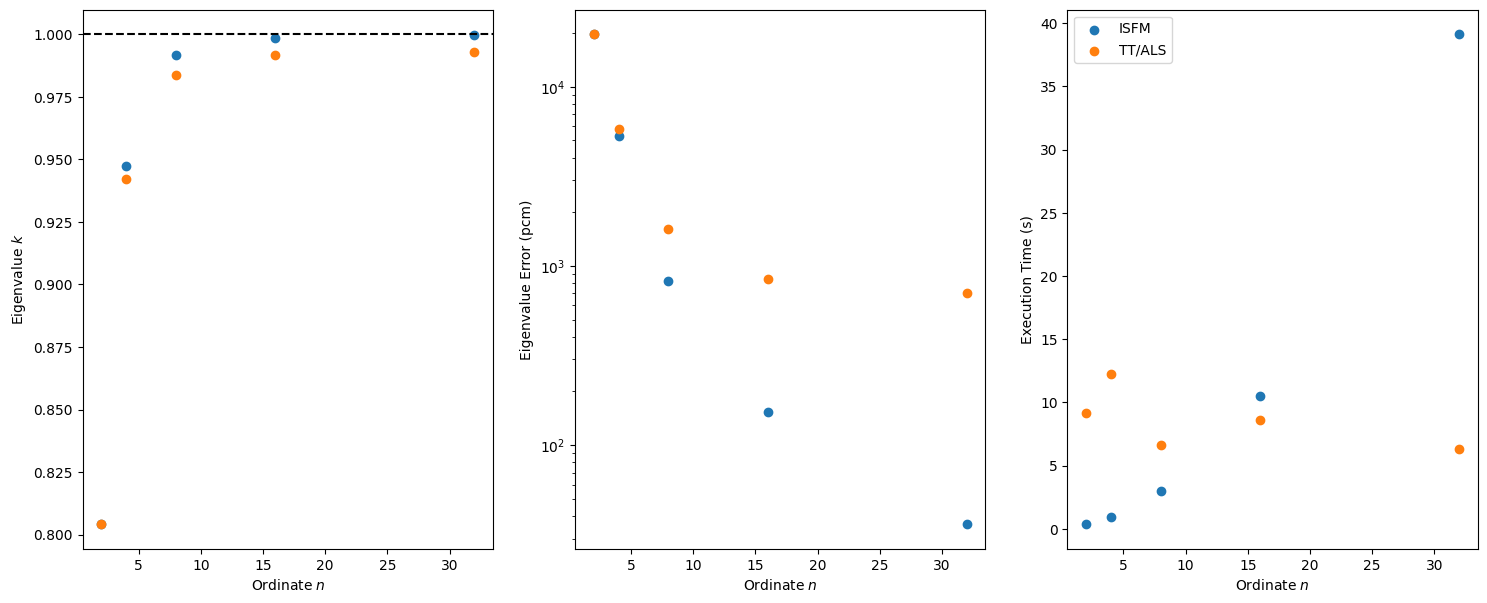

In [24]:
# Slab Geometry
num_nodes = 1023
geometry = Geometry({fissile_brick: {"num_nodes": num_nodes, "thickness": thickness}})

num_ordinates_list = [2, 4, 8, 16, 32]

SN = DiscreteOrdinates(
    xs_server=xs_server,
    geometry=geometry,
    num_ordinates=num_ordinates_list[0],
    tol=tol,
)

solvers = 

ks = {"ISFM": [], "TT/ALS": []}
exec_times = {"ISFM": [], "TT/ALS": []}

expected_k = 1
psi = None

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))
ax1.axhline(expected_k, color="k", ls="--", label="Ground Truth")

for method in ks.keys():
    for num_ordinates in num_ordinates_list:
        # Initialize solver
        SN = DiscreteOrdinates(
            xs_server=xs_server, 
            geometry=geometry, 
            num_ordinates=num_ordinates, 
            tol=tol,
        )
    
        # Run and time matrix power iteration
        k = None
        start = None
        stop = None
        if method == "ISFM":
            start = time.time()
            k, psi = SN.solve_matrix_power()
            stop = time.time()
        elif method == "TT/ALS":
            start = time.time()
            k, psi = SN.solve_TT_power(method="als")
            stop = time.time()
    
        ks[method].append(k)
        exec_times[method].append(stop - start)
        
    ax1.scatter(num_ordinates_list, ks[method], label=method)
    ax2.scatter(num_ordinates_list, np.abs(expected_k - np.array(ks[method])) * 1e5, label=method)
    ax3.scatter(num_ordinates_list, exec_times[method], label=method)

ax1.set(xlabel="Ordinate $n$", ylabel="Eigenvalue $k$")
ax2.set(xlabel="Ordinate $n$", ylabel="Eigenvalue Error (pcm)")
ax3.set(xlabel="Ordinate $n$", ylabel="Execution Time (s)")
ax2.set_yscale("log")
plt.legend()
plt.show()

#### With Reflective BCs

With reflective boundary conditions our operators become
$$
k_{\infty} = \f{\nu\s{f}}{\s{t} - \s{s}} = 2.6129
$$

In [26]:
# Slab Geometry
thickness = 3.707444  # cm
num_nodes = 3
geometry = Geometry({fissile_brick: {"num_nodes": num_nodes, "thickness": thickness}})

# Initialize SN solver
tol = 1e-6
SN = DiscreteOrdinates(
    xs_server=xs_server, geometry=geometry, num_ordinates=4, bc="reflective", tol=tol
)

mat_shape = (
    xs_server.num_groups * SN.num_ordinates * (num_nodes + 1),
    xs_server.num_groups * SN.num_ordinates * (num_nodes + 1),
)

print("\nStreaming + Total Interaction Operator")
pd.DataFrame(SN.H.full().reshape(mat_shape))

Tensor Trains:
Migration operator 
Tensor train with order    = 2, 
                  row_dims = [4, 4], 
                  col_dims = [4, 4], 
                  ranks    = [1, 8, 1]
Fission operator 
Tensor train with order    = 2, 
                  row_dims = [4, 4], 
                  col_dims = [4, 4], 
                  ranks    = [1, 2, 1]
Scatter operator 
Tensor train with order    = 2, 
                  row_dims = [4, 4], 
                  col_dims = [4, 4], 
                  ranks    = [1, 2, 1]

Streaming + Total Interaction Operator


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.860017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.860017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.533617,0.860017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.533617,0.860017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,-0.533617,0.860017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.438307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.438307,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,-0.111907,0.438307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,-0.111907,0.438307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.111907,0.438307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860017,-0.533617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860017,-0.533617,0.000000,0.000000,0.000000,0.000000,0.000000


Tensor Trains:
Migration operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
                  ranks    = [1, 8, 1]
Fission operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
                  ranks    = [1, 2, 1]
Scatter operator 
Tensor train with order    = 2, 
                  row_dims = [2, 1024], 
                  col_dims = [2, 1024], 
                  ranks    = [1, 2, 1]
-- SN with full matrix power iteration
--   (0) Error=27.22674395813593, k=1.214714453282572
--   (1) Error=16.5784216191836, k=1.6481529727650923
--   (2) Error=11.436385256655415, k=1.9472255512080532
--   (3) Error=7.89047365346111, k=2.15358563033371
--   (4) Error=5.444288016424993, k=2.2959740849304247
--   (5) Error=3.7565338022380894, k=2.394222118602164
--   (6) Error=2.5920042816466053, k=2.46201326183567
--   (7) Error=1.7884823364090296, k=2.508789150

--   (20) Error=0.01942189337600566, k=2.6121492499288133
--   (21) Error=0.013401106428721271, k=2.612382982450926
--   (22) Error=0.009246763435588482, k=2.6125442578911837
--   (23) Error=0.006380266770499061, k=2.6126555379449616
--   (24) Error=0.004402384071638598, k=2.6127323211820688
--   (25) Error=0.0030376450093795265, k=2.6127853016156717
--   (26) Error=0.0020959750564979347, k=2.6128218581148586
--   (27) Error=0.0014462227889918719, k=2.6128470820992975
--   (28) Error=0.0009978937243635758, k=2.6128644866485593
--   (29) Error=0.0006885466698597441, k=2.612876495787551
--   (30) Error=0.00047509720221263814, k=2.6128847820934555
--   (31) Error=0.00032781706949078454, k=2.612890499644529
--   (32) Error=0.0002261937779452869, k=2.61289444475477
--   (33) Error=0.0001560737067975065, k=2.6128971668808356
--   (34) Error=0.00010769085766533818, k=2.612899045147821
--   (35) Error=7.430669181424762e-05, k=2.6129003411520415
--   (36) Error=5.127161746109728e-05, k=2.612901

--   (44) Error=6.978450117730486e-06, k=2.612903115474825
--   (45) Error=4.815130464488696e-06, k=2.6129031496776594
--   (46) Error=3.322439942940787e-06, k=2.6129031732776147
--   (47) Error=2.2924836007744573e-06, k=2.612903189561584
--   (48) Error=1.5818137344538793e-06, k=2.6129032007975224
--   (49) Error=1.0914513786061565e-06, k=2.6129032085503203
--   (50) Error=7.531014160100712e-07, k=2.61290321389975


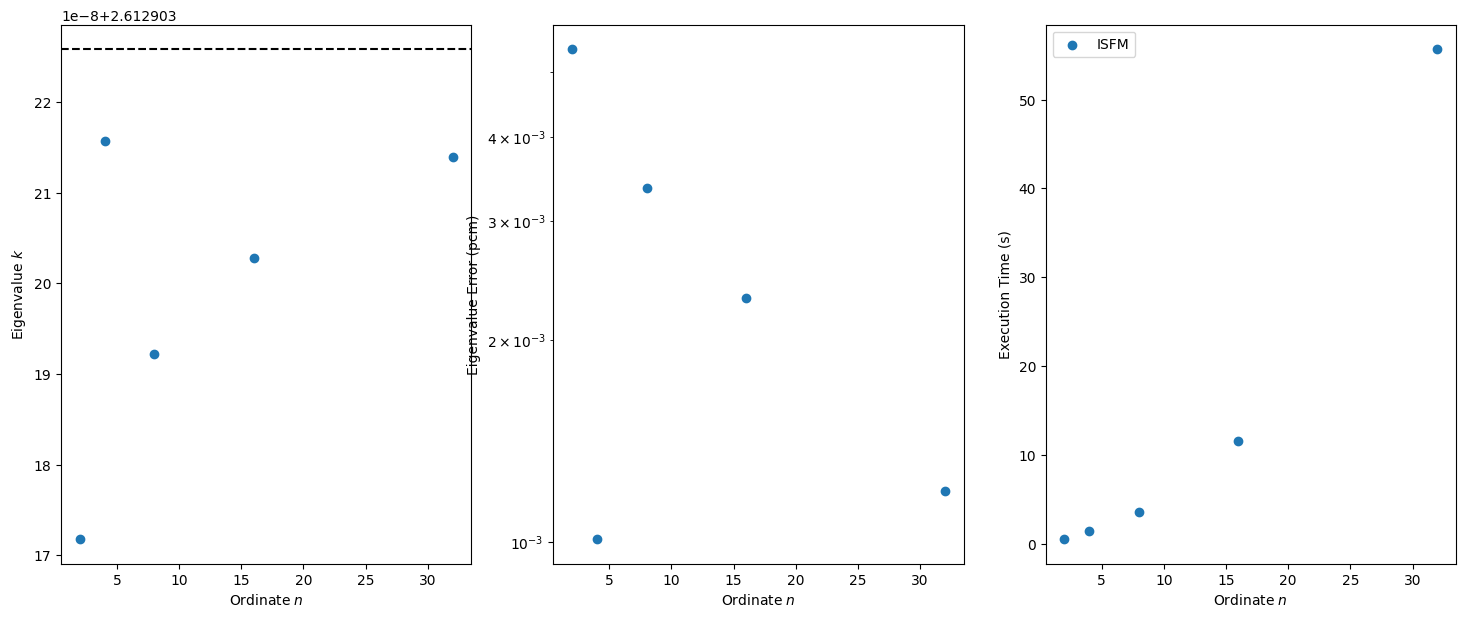

In [23]:
# Slab Geometry
num_nodes = 1023
geometry = Geometry({fissile_brick: {"num_nodes": num_nodes, "thickness": thickness}})

num_ordinates_list = [2, 4, 8, 16, 32]

expected_k = 0.264384 / (0.3264 - 0.225216)

ks = {"ISFM": []}
exec_times = {"ISFM": []}

psi = None

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))
ax1.axhline(expected_k, color="k", ls="--", label="Ground Truth")

for method in ks.keys():
    for num_ordinates in num_ordinates_list:
        # Initialize solver
        SN = DiscreteOrdinates(
            xs_server=xs_server, 
            geometry=geometry, 
            num_ordinates=num_ordinates,
            bc="reflective",
            tol=tol,
        )
    
        # Run and time matrix power iteration
        start = time.time()
        k, psi = SN.solve_matrix_power()
        stop = time.time()
    
        ks[method].append(k)
        exec_times[method].append(stop - start)
        
    ax1.scatter(num_ordinates_list, ks[method], label=method)
    ax2.scatter(num_ordinates_list, np.abs(expected_k - np.array(ks[method])) * 1e5, label=method)
    ax3.scatter(num_ordinates_list, exec_times[method], label=method)

ax1.set(xlabel="Ordinate $n$", ylabel="Eigenvalue $k$")
ax2.set(xlabel="Ordinate $n$", ylabel="Eigenvalue Error (pcm)")
ax3.set(xlabel="Ordinate $n$", ylabel="Execution Time (s)")
ax2.set_yscale("log")
plt.legend()
plt.show()

In [13]:
# Slab Geometry
thickness = 3.707444  # cm
num_nodes = 1023
geometry = Geometry({fissile_brick: {"num_nodes": num_nodes, "thickness": thickness}})

# Initialize SN solver
tol = 1e-6
SN = DiscreteOrdinates(
    xs_server=xs_server, geometry=geometry, num_ordinates=2, bc="vacuum", tol=tol
)

SN.solve_TT_power()

(0.8041837292564232,
 array([-1.49472679e-16,  1.26798834e-03,  2.53597296e-03, ...,
         2.53597297e-03,  1.26798834e-03, -3.25456099e-16]))

In [14]:
SN.solve_scikit_tt_power()

(1.2434969147701547,
 
 Tensor train with order    = 2, 
                   row_dims = [2, 1024], 
                   col_dims = [1, 1], 
                   ranks    = [1, 2, 1])